# Scikit-learn Exercise B

Try to work through the exercise notebook with reference to the lesson notebook, and the scikit-learn documentation at: https://scikit-learn.org/stable/

If you are stuck, ask the instructor or a TA for help. If you'd like to work in groups then that's fine too.

## Preparation

We'll load in the datasets for you here...

In [6]:
# Digits image dataset
from sklearn.datasets import load_digits
digits = load_digits()

# BC-TCGA dataset
import pandas as pd
bc_df = pd.read_csv('BC-TCGA_prepared.csv', index_col=0)

### Hints

W'ere going to go back to the BC-TCGA dataset and try to create a classifier for it.

There's a catch... the >17,000 Gene expression values are a huge number of features to consider in a model. We have far fewer samples than features, which is usually a bad thing. We need to either:

  - Use dimensionality reduction (like PCA) to give us a smaller number of features to train our model
  - Use a feature selection procedure to pick a subset of the best features.

A simple feature selection is to pick the K best features according to some criterion. We could use the mutual information measure here:

```python
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X_new = SelectKBest(mutual_info_classif, k=100).fit_transform(X, y)
```

### B1. Use the SelectKBest method above on the BC-TCGA dataset to get a dataset with the 100 'best' genes

In [7]:
# Pull out X and y again
bc_df = bc_df.dropna(axis='columns')
y=bc_df['CLASS'].values
X=bc_df.drop(columns=['CLASS']).values

# Use KBest
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X_new = SelectKBest(mutual_info_classif, k=100).fit_transform(X, y)


### B2. Visualize the data with PCA. How does it compare to PCA over the compete set of genes?

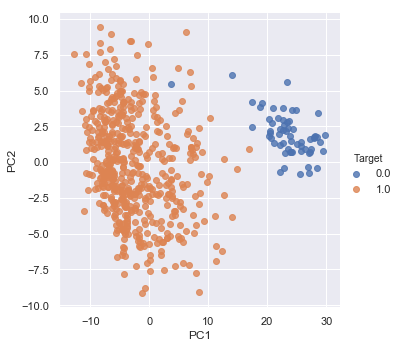

In [11]:
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns; sns.set()

pca = decomposition.PCA(n_components=2)
pca.fit(X_new)
X_pca = pca.transform(X_new)

# Convert it into a pandas dataframe with nice column labels, and add the target categories
X_pca_df = pd.DataFrame(data=X_pca, columns= ['PC1', 'PC2'])
X_pca_df['Target'] = y

# A simple scatter plot... we don't want seaborn to fit regression lines
sns.lmplot(x="PC1", y="PC2", data=X_pca_df, hue='Target', fit_reg=False)

### B3. Create and evaluate a logicstic regression classifier on the set of 100 best genes.

In [12]:
from sklearn.model_selection import train_test_split


# Take 40% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

print("Training size: {0}, Testing size: {1}".format(len(y_train), len(y_test)))

Training size: 354, Testing size: 236


In [14]:
from sklearn.linear_model import LogisticRegression

# Create and fit our logistic regression model
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf.fit(X_train, y_train)

# Calculate the accuracy of the model on the training and testing (unseen) data
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Training accuracy: {0}".format(train_score))
print("Testing accuracy: {0}".format(test_score))

Training accuracy: 1.0
Testing accuracy: 0.9957627118644068


[Text(30.5, 0.5, 'Actual'), Text(0.5, 12.5, 'Predicted')]

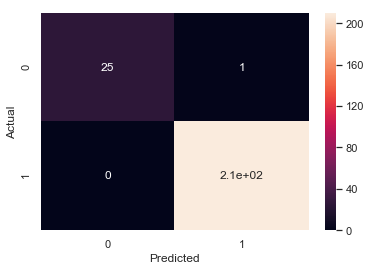

In [15]:
from sklearn.metrics import confusion_matrix

# Ask our model to predict the digits in the test data set
y_pred = clf.predict(X_test)
# Create a confusion matrix from the predictions
cm = confusion_matrix(y_test, y_pred)

# A seaborn heatmap, with each cell annotated, is an excellent way to look at this...
ax = sns.heatmap(cm, annot=True)
ax.set(xlabel="Predicted", ylabel="Actual")
ax.set(xlabel="Predicted", ylabel="Actual")

**Bonus points - Use your Pandas knowledge to find the names of the genes that were selected by the feature selection procedure.**